In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df = pd.read_csv("../../Mega_data/Project02/data.csv", encoding = 'euc-kr')

In [4]:
df.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20191,D,발달상권,3120037,동대문역사문화공원역,CS200029,네일숍,20393290.0,208,17051978.0,...,86,27,0,208,0,56,21,0,123,8
1,20191,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,CS200029,네일숍,73147711.0,2136,57025458.0,...,1270,35,59,2077,0,715,995,236,157,33
2,20191,A,골목상권,3110085,경리단길남측,CS200029,네일숍,3000000.0,40,2337081.0,...,14,9,0,40,0,8,28,5,0,0
3,20191,A,골목상권,3110166,구의1동주민센터,CS200029,네일숍,8443798.0,153,4984275.0,...,64,13,13,140,0,52,88,13,0,0
4,20191,A,골목상권,3110161,중곡역 3번,CS200029,네일숍,20756990.0,305,16694436.0,...,196,36,4,301,0,79,28,68,91,39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323792 entries, 0 to 323791
Data columns (total 55 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준_년분기_코드        323792 non-null  int64  
 1   상권_구분_코드         323792 non-null  object 
 2   상권_구분_코드_명       323792 non-null  object 
 3   상권_코드            323792 non-null  int64  
 4   상권_코드_명          323792 non-null  object 
 5   서비스_업종_코드        323792 non-null  object 
 6   서비스_업종_코드_명      323792 non-null  object 
 7   당월_매출_금액         323792 non-null  float64
 8   당월_매출_건수         323792 non-null  int64  
 9   주중_매출_금액         323792 non-null  float64
 10  주말_매출_금액         323792 non-null  float64
 11  월요일_매출_금액        323792 non-null  float64
 12  화요일_매출_금액        323792 non-null  float64
 13  수요일_매출_금액        323792 non-null  float64
 14  목요일_매출_금액        323792 non-null  float64
 15  금요일_매출_금액        323792 non-null  float64
 16  토요일_매출_금액        323792 non-null  floa

In [6]:
df.shape

(323792, 55)

In [7]:
df['년도'] = df['기준_년분기_코드'] // 10
df['분기'] = df['기준_년분기_코드'] % 10

In [8]:
df['년도_분기'] = df['년도'].map(str) + "년 " + df['분기'].map(str) + "분기"

In [9]:
rev = df.groupby(['년도_분기', '상권_구분_코드_명']).sum(numeric_only=True)[['당월_매출_금액', '당월_매출_건수']]

In [10]:
rev.reset_index(inplace = True)

In [11]:
rev['상권_구분_코드_명'].unique()

array(['골목상권', '관광특구', '발달상권', '전통시장'], dtype=object)

In [12]:
rev['당월_ATV'] = rev['당월_매출_금액'] / rev['당월_매출_건수']

In [13]:
rev_1 = rev[rev['상권_구분_코드_명'] == '관광특구']

In [14]:
rev_1

,년도_분기,상권_구분_코드_명,당월_매출_금액,당월_매출_건수,당월_ATV
1,2019년 1분기,관광특구,1.139666e+12,32472529,35096.324539
5,2019년 2분기,관광특구,1.187982e+12,36030955,32971.141678
9,2019년 3분기,관광특구,1.165868e+12,36869736,31621.286067
13,2019년 4분기,관광특구,1.356355e+12,37950399,35740.210603
17,2020년 1분기,관광특구,1.007058e+12,28794682,34973.738431
21,2020년 2분기,관광특구,1.057572e+12,30467783,34711.141531
25,2020년 3분기,관광특구,9.954383e+11,29083914,34226.422132
29,2020년 4분기,관광특구,1.043065e+12,27676913,37687.184576
33,2021년 1분기,관광특구,9.717777e+11,26043978,37312.952065
37,2021년 2분기,관광특구,1.134662e+12,32640395,34762.523351


In [15]:
x = np.arange(0, len(rev_1))
xticks = rev_1['년도_분기']
y = rev_1['당월_매출_금액']

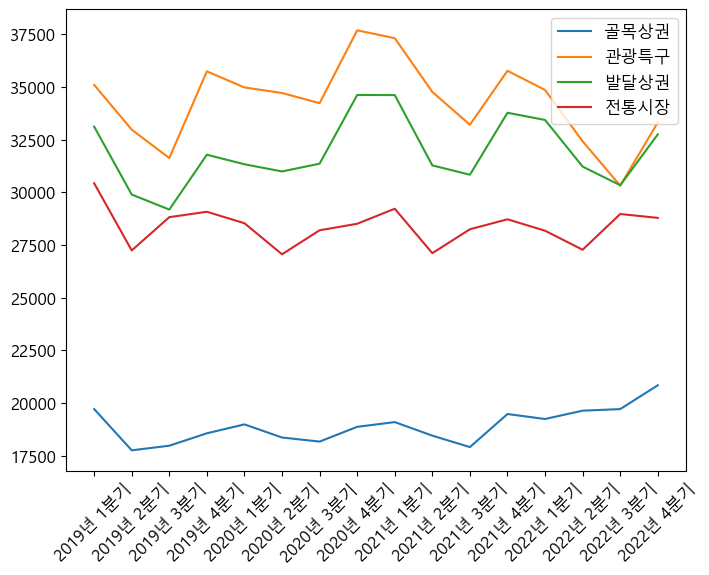

In [16]:
plt.figure()
for i in rev['상권_구분_코드_명'].unique():
    plt.plot(x, rev[rev['상권_구분_코드_명'] == i]['당월_ATV'], label = i)
plt.xticks(x, xticks, rotation = 45)
plt.legend()
plt.show()

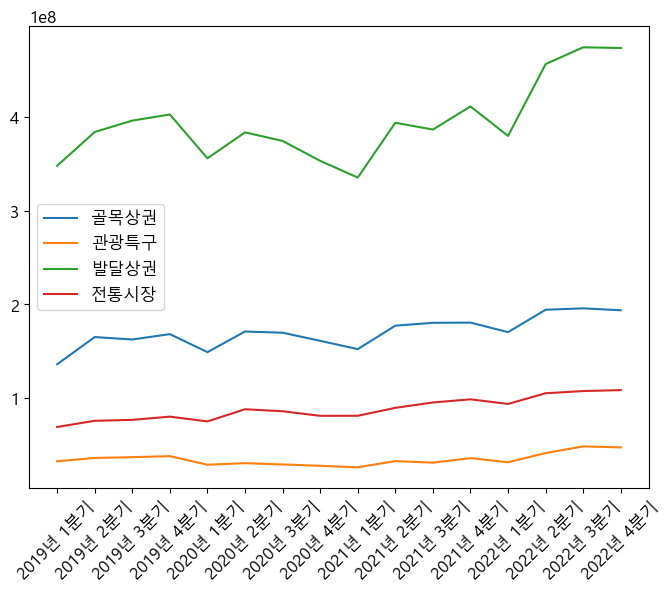

In [17]:
plt.figure()
for i in rev['상권_구분_코드_명'].unique():
    plt.plot(x, rev[rev['상권_구분_코드_명'] == i]['당월_매출_건수'], label = i)
plt.xticks(x, xticks, rotation = 45)
plt.legend()
plt.show()

In [18]:
top10 = list(df.groupby('상권_코드_명').sum(numeric_only = True)['당월_매출_금액'].sort_values(ascending = False)[:10].index)

In [19]:
top10

['용산전자상가(용산역)',
 '노량진역(노량진)',
 '가산디지털단지',
 '가락시장',
 '강남역',
 '명동 남대문 북창동 다동 무교동 관광특구',
 '종로3가역',
 '강남 마이스 관광특구',
 '종로·청계 관광특구',
 '잠실 관광특구']

In [20]:
by_market = df.groupby(['년도_분기', '상권_코드_명']).sum(numeric_only = True).reset_index()

In [21]:
yongsan = by_market[by_market['상권_코드_명'] == top10[0]]

In [22]:
yongsan.head()

,년도_분기,상권_코드_명,기준_년분기_코드,상권_코드,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,년도,분기
1192,2019년 1분기,용산전자상가(용산역),565348,87361120,1.308871e+12,4061248,9.932348e+11,3.156391e+11,1.823298e+11,1.752153e+11,...,2535375,861740,67810,634253,800768,883749,664755,345757,56532,28
2736,2019년 2분기,용산전자상가(용산역),565376,87361120,1.035413e+12,3525803,8.153964e+11,2.200165e+11,1.621347e+11,1.912724e+11,...,2157193,760050,31695,531492,713737,757761,551383,331176,56532,56
4284,2019년 3분기,용산전자상가(용산역),585597,90481160,1.042751e+12,3687176,8.527806e+11,1.899708e+11,1.938875e+11,1.833137e+11,...,2279933,810258,36306,600251,754820,745732,583866,369194,58551,87
5833,2019년 4분기,용산전자상가(용산역),605820,93601200,1.118007e+12,3934884,9.169401e+11,2.010681e+11,1.891955e+11,1.785215e+11,...,2408241,820931,49014,563375,723337,781945,592471,519013,60570,120
7384,2020년 1분기,용산전자상가(용산역),565628,87361120,1.079271e+12,3957007,8.494723e+11,2.297991e+11,1.676954e+11,1.836666e+11,...,2494487,829735,30027,535568,766649,836676,680929,474352,56560,28


In [23]:
x = np.arange(0, len(yongsan))
xticks = yongsan['년도_분기']
y = yongsan['당월_매출_금액']

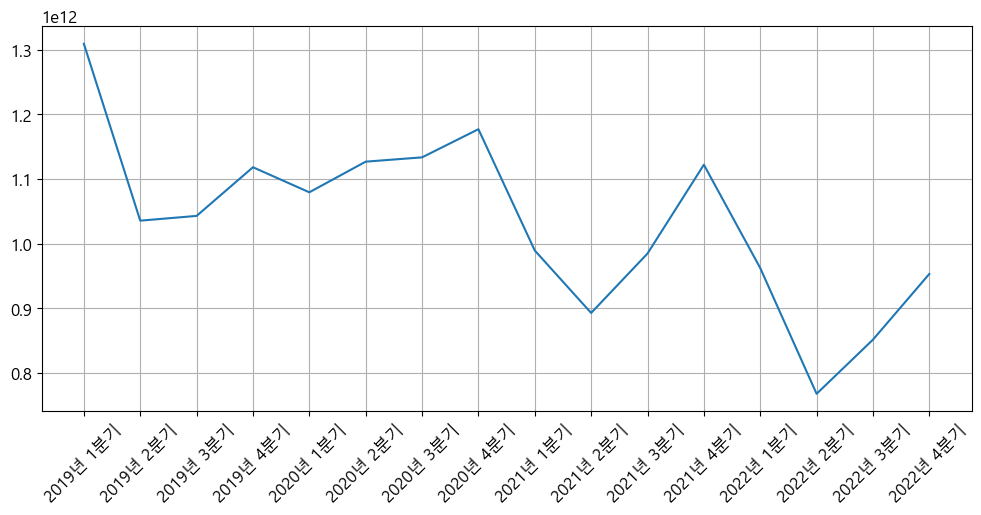

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(x, y)
plt.xticks(x, xticks, rotation = 45)
plt.grid()
plt.show()

In [25]:
age_y = []

for i in yongsan.columns:
    if "연령대" in i:
        age_y.append(i)

In [26]:
age_y

['연령대_10_매출_금액',
 '연령대_20_매출_금액',
 '연령대_30_매출_금액',
 '연령대_40_매출_금액',
 '연령대_50_매출_금액',
 '연령대_60_이상_매출_금액',
 '연령대_10_매출_건수',
 '연령대_20_매출_건수',
 '연령대_30_매출_건수',
 '연령대_40_매출_건수',
 '연령대_50_매출_건수',
 '연령대_60_이상_매출_건수']

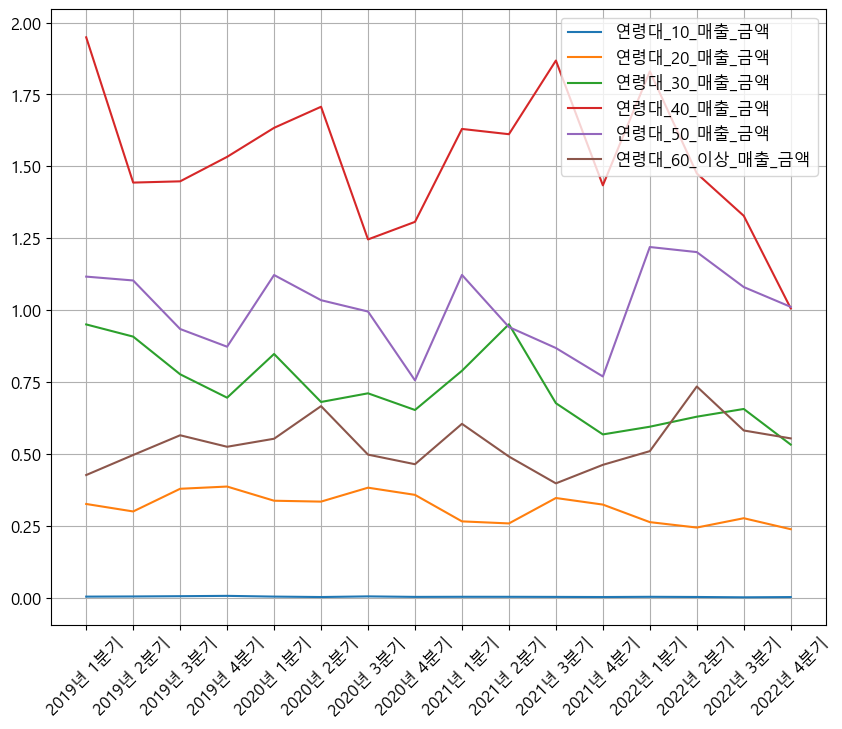

In [35]:
plt.figure(figsize=(10, 8))
for i, v in enumerate(age_y[:6]):
    plt.plot(x, yongsan[v] / yongsan.iloc[:, i+6], label = v)
plt.xticks(x, xticks, rotation = 45)
plt.grid()
plt.legend()
plt.show()

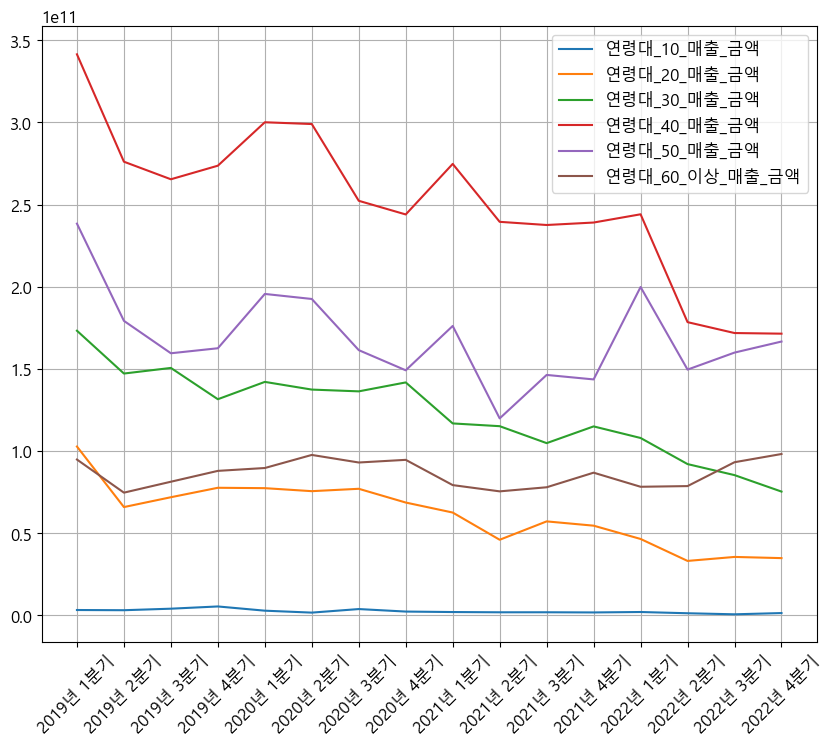

In [37]:
plt.figure(figsize=(10, 8))
for i in age_y[:6]:
    plt.plot(x, yongsan[i], label = i)
plt.xticks(x, xticks, rotation = 45)
plt.grid()
plt.legend()
plt.show()

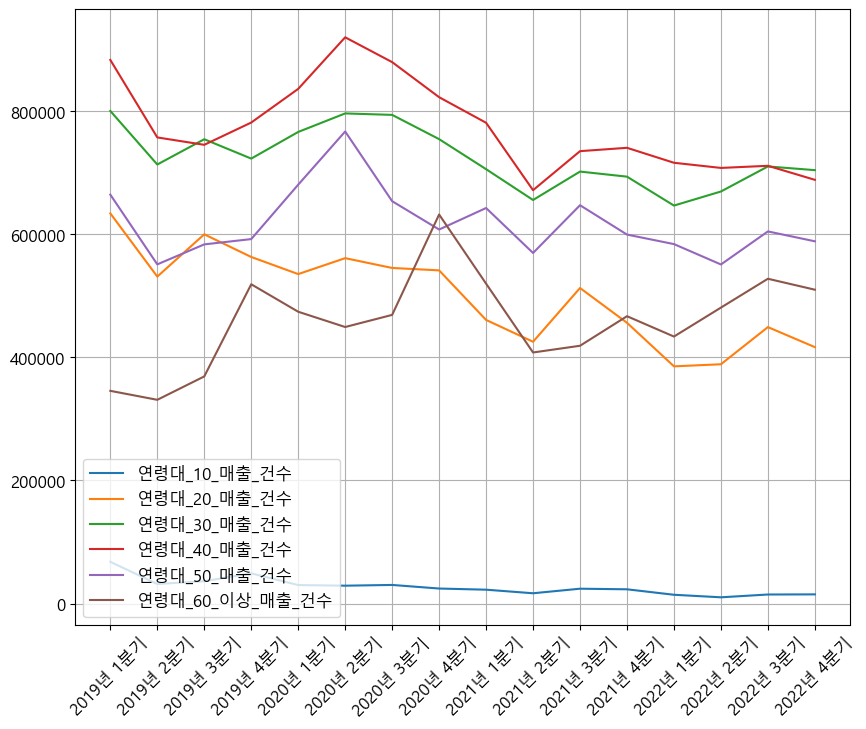

In [36]:
plt.figure(figsize=(10, 8))
for i in age_y[6:]:
    plt.plot(x, yongsan[i], label = i)
plt.xticks(x, xticks, rotation = 45)
plt.grid()
plt.legend()
plt.show()